In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()


In [24]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [25]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [31]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

## Sepal Length vs Sepal width (Setosa vs Versicolor)

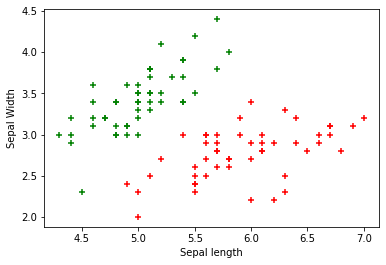

In [32]:
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],marker='+',color='green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],marker='+',color='red')

## petal Length vs Petal width (Setosa vs Versicolor)

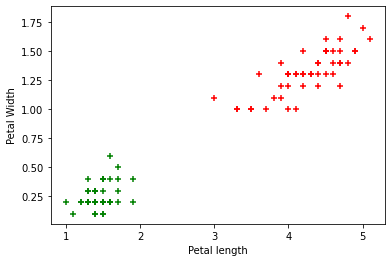

In [33]:
plt.xlabel("Petal length")
plt.ylabel("Petal Width")

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],marker='+',color='green')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],marker='+',color='red')

In [34]:
X = df.drop(['target','flower_name'],axis=1)
y = df.target

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)


In [35]:
len(X_train)

105

## KNN Algorithm

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
knn.score(X_test,y_test)
## all predictions are correct

1.0

In [38]:
## sample prediction for the values
knn.predict([[4.8,3.0,1.5,0.3]])

## gives output as type 0

array([0])

In [39]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

Text(33.0, 0.5, 'True values')

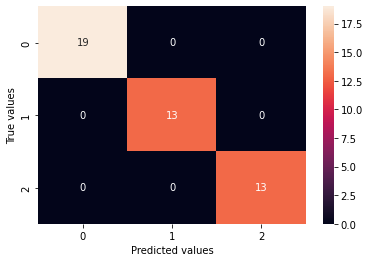

In [40]:
import seaborn as sns
sns.heatmap(cm,annot=True)  ## annot == True will write the values in the grids
plt.xlabel("Predicted values")
plt.ylabel("True values")

## Precision, Recall and F1 score

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

